In [2]:
import pandas as pd
import random
#import matplotlib.pyplot as plt

audio files with the filenames indexed between 113 (331 Hz) and 615 (2032 Hz) are used

In [3]:
aud_stimuli_dif = 30 #file index 
vis_stimuli_dif = aud_stimuli_dif #

In [4]:
def sound_number_conv(a):
    if a > 585:
        a = a - 615
    return a

In [5]:
def generate_sounds(min_sound, max_sound):
    sound_1 = random.randint(min_sound, max_sound-30)
    d1 = random.randint(80, 200)
    d2 = random.randint(d1 + 80,502-30)
    aud1 = [sound_1, sound_number_conv(sound_1+d1), sound_number_conv(sound_1+d2)]
    aud2 = list(map(lambda x:x+30,aud1))
    return [aud1,aud2]

In [6]:
def generate_sounds():
    a1 = random.randint(0,70)
    a2 = random.randint(a1 + 70, 170)
    a3 = random.randint(a2 + 70, 270)
    a4 = random.randint(a3 + 70, 370)
    a5 = random.randint(a4 + 70, 472)
    a = [a1,a2,a3,a4,a5]
    random.shuffle(a)
    aud = [a[0],a[1],a[1],a[2],a[3],a[3],a[4]]
    aud1 = list(map(lambda x: x+113,aud))
    aud2 = list(map(lambda x: x+143,aud))
    return [aud1,aud2]

In [7]:
def degree_check(degree, degree_list):
    for d in degree_list:
        if degree in range(d-10,d+10):
            return False
    return True

def angles_update(v, vv, angles):
    angles = [angle for angle in angles if angle not in range(v-10,v+11)]
    angles = [angle for angle in angles if angle not in range(vv-10,vv+11)]
    return angles

def generate_visual():
    #print('gen_vis')
    done = False
    while not done:
        failed = False
        angles = [x for x in range(1,181)]
        vis1 = []
        vis2 = []
    
        for i in range(5):
            #print('i = ',i)
            not_checked = True
            while not_checked:
                #print(len(angles))
                v = random.sample(angles,1)[0]
                vv = v + vis_stimuli_dif
                if vv in angles:
                    not_checked = False
                else:
                    angles.remove(v)
                    #print(angles)
                    if len(angles) == 0:
                        failed = True
                        break
            
            if failed: 
                print('failed')
                break
                    
            vis1.append(v)
            vis2.append(vv)
            if i == 1 or i == 3:
                vis1.append(v)
                vis2.append(vv)
            angles = angles_update(v, vv, angles)
        
            if i == 4:
                done = True
    
    return vis1, vis2
print(generate_visual())

([36, 134, 134, 88, 149, 149, 22], [66, 164, 164, 118, 179, 179, 52])


In [8]:
def generate_stimuli(how_many):
    AUD = True
    a = 0 #to change to VIS every 2 iterations
    easy_first = True
    aud = []
    vis = []
    for i in range(how_many):
        print('i = ',i)
        stimuli = pd.DataFrame()
        if AUD:
            relevant_modality = ['AUD']*3 + ['VIS']*3 + ['AUD']
        else:
            relevant_modality = ['VIS']*3 + ['AUD']*3 + ['VIS']

        aud1, aud2 = generate_sounds()
        vis1, vis2 = generate_visual()
        aud = aud + list(set(aud1)) + list(set(aud2))
        vis = vis + list(set(vis1)) + list(set(vis2))
        
        stimuli['relevant_modality'] = relevant_modality
        stimuli['aud1'] = aud1
        stimuli['aud2'] = aud2
        stimuli['vis1'] = vis1
        stimuli['vis2'] = vis2
        print('stimuli')
        
        if easy_first:
            if AUD: 
                stimuli.loc[5,'vis2'] = 0
            else:
                stimuli.loc[5,'aud2'] = 0
        else:
            if AUD:
                stimuli.loc[2,'aud2'] = 0
            else:
                stimuli.loc[2,'vis2'] = 0
        
        filename = 'stimuli_' + str(i+1) + '.csv'
        print(filename)
        print('easy_first', easy_first)
        print('AUD', AUD)
        stimuli.to_csv(filename)
        print(stimuli)
        print(' ')
        
        if easy_first:
            easy_first = False
        else: 
            easy_first = True
            
        if AUD:
            a = a+1
            if a == 2:
                a = 0
                AUD = False
        else:
            a = a+1
            if a == 2:
                a = 0
                AUD = True
    return aud, vis

In [9]:
aud, vis = generate_stimuli(30)

i =  0
failed
stimuli
stimuli_1.csv
easy_first True
AUD True
  relevant_modality  aud1  aud2  vis1  vis2
0               AUD   545   575   126   156
1               AUD   444   474    55    85
2               AUD   444   474    55    85
3               VIS   242   272    10    40
4               VIS   163   193   109   139
5               VIS   163   193   109     0
6               AUD   344   374    68    98
 
i =  1
stimuli
stimuli_2.csv
easy_first False
AUD True
  relevant_modality  aud1  aud2  vis1  vis2
0               AUD   331   361    84   114
1               AUD   177   207    22    52
2               AUD   177     0    22    52
3               VIS   251   281   131   161
4               VIS   576   606    10    40
5               VIS   576   606    10    40
6               AUD   462   492    70   100
 
i =  2
stimuli
stimuli_3.csv
easy_first True
AUD False
  relevant_modality  aud1  aud2  vis1  vis2
0               VIS   331   361   140   170
1               VIS   169   199  

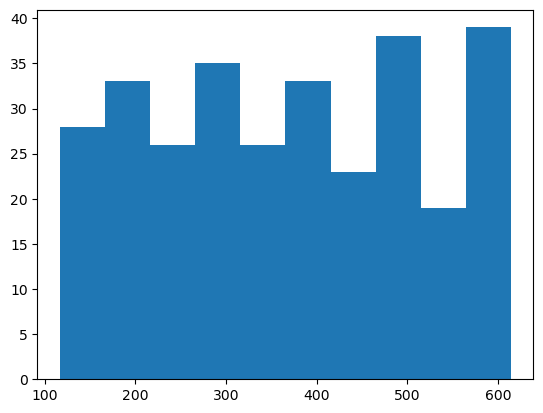

In [11]:
plt.hist(aud)
plt.show()

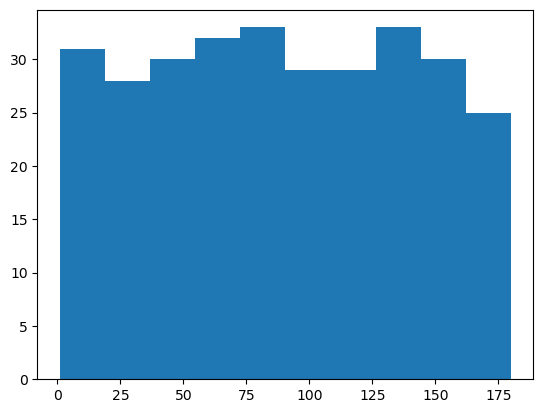

In [12]:
plt.hist(vis)
plt.show()